In [18]:
## visualizing gradient descent for j

import numpy as np
import matplotlib.pyplot as plt

# define the function
x1 = 1
x2 = 1
w1 = 0
w2 = 0

J = (x1*w1 - 5*x2*w2 - 2)**2

# define the partial derivatives
dJdw1 = 2*(x1*w1 - 5*x2*w2 - 2)*x1
dJdw2 = 2*(x1*w1 - 5*x2*w2 - 2)*(-5*x2)

learning_rate = 0.01
epoch = 100

# gradient descent
w1Array = []
w2Array = []
JArray = []
for i in range(epoch):
    w1Array.append(w1)
    w2Array.append(w2)
    JArray.append(J)
    w1 = w1 - learning_rate*dJdw1
    w2 = w2 - learning_rate*dJdw2

    J = (x1*w1 - 5*x2*w2 - 2)**2
    dJdw1 = 2*(x1*w1 - 5*x2*w2 - 2)*x1
    dJdw2 = 2*(x1*w1 - 5*x2*w2 - 2)*(-5*x2)

    ##print("epoch: ", i, "J: ", J, "w1: ", w1, "w2: ", w2)


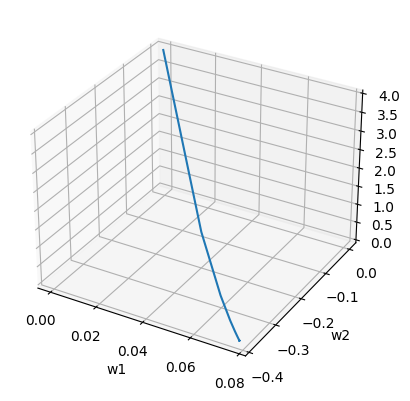

In [23]:
# plot the function as a line plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(w1Array, w2Array, JArray)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J')
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def readCSV():
    dataIn = np.genfromtxt('../data/medical.csv', delimiter=',')
    return dataIn[1:]

X = readCSV()
Y = X[:, [-1]].copy()
X = np.delete(X, -1, axis=1)

from layers import *
import math

L1 = inputLayer(X)
L2 = LinearLayer()
L3 = fullyConnectedLayer(X.shape[1], 1)
L4 = SquaredErrorLoss()

L = [L1, L2, L3, L4]

#forwards!
# h = X
# for i in range(len(L)-1):
#     h = L[i].forward(h)

# #backwards!
# grad = L[-1].gradient(Y,h)
# for i in range(len(L)-2,0,-1):
#     newgrad = L[i].backward(grad)
#     if (isinstance(L[i], fullyConnectedLayer)):
#         L[i].update_weights(grad,math.pow(10,-4))
#     grad = newgrad

## for 1000 epochs and learning rate 0.0001 doing forward and backward pass and updating weights and biases for each layer

evaluate = []
h = X
for i in range(10000):
    ## Terminate the learning process when the absolute change in the mean squared error on the training data is less than 10^−10
    if (i > 0 and abs(evaluate[i-1] - evaluate[i]) < math.pow(10,-10)): break
    else:
        ## forward pass
        for i in range(len(L)-1):
            h = L[i].forward(h)
        ## evaluating loss
        evalval = L4.eval(Y,h)
        evaluate.append(L4.eval(Y,h))
        ## backward pass
        grad = L[-1].gradient(Y,h)
        for i in range(len(L)-2,0,-1):
            newgrad = L[i].backward(grad)
            if (isinstance(L[i], fullyConnectedLayer)):
                L[i].update_weights(grad,math.pow(10,1))
            grad = newgrad
        print("LOSS: ",evalval)
    

## plotting loss vs epochs
plt.plot(evaluate)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

IndexError: list index out of range

In [4]:
## saving the array as numpy array

eval = np.array(evaluate)

In [7]:
np.save('loss_plot', eval)